In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [17]:
dataset = pd.read_csv('California_Houses.csv')
print(dataset.head())
print("\n")

   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.5170

In [18]:
dataset.head(15)

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
5,269700.0,4.0368,52,919,213,413,193,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
6,299200.0,3.6591,52,2535,489,1094,514,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
7,241400.0,3.1200,52,3104,687,1157,647,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972
8,226700.0,2.0804,42,2555,665,1206,595,37.84,-122.26,6363.948013,554949.749519,733820.824419,64751.463863,16744.406584
9,261100.0,3.6912,52,3549,707,1551,714,37.84,-122.25,6843.020847,554364.406936,733249.808578,64315.991742,17538.209972


In [19]:
missingvalue = dataset.isnull().sum()
print("Missing values in each column:\n", missingvalue)

Missing values in each column:
 Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64


In [20]:
# for normalising
object = StandardScaler()
object.fit_transform(dataset)

array([[ 2.12963148,  2.34476576,  0.98214266, ...,  1.16566824,
        -1.29754558, -1.46107412],
       [ 1.31415614,  2.33223796, -0.60701891, ...,  1.1578418 ,
        -1.30851803, -1.46255188],
       [ 1.25869341,  1.7826994 ,  1.85618152, ...,  1.15883974,
        -1.30935903, -1.47082449],
       ...,
       [-0.99274649, -1.14259331, -0.92485123, ...,  1.49462431,
        -0.50204022, -0.69803768],
       [-1.05860847, -1.05458292, -0.84539315, ...,  1.50835264,
        -0.51115099, -0.71472888],
       [-1.01787803, -0.78012947, -1.00430931, ...,  1.47689622,
        -0.5337677 , -0.72452362]])

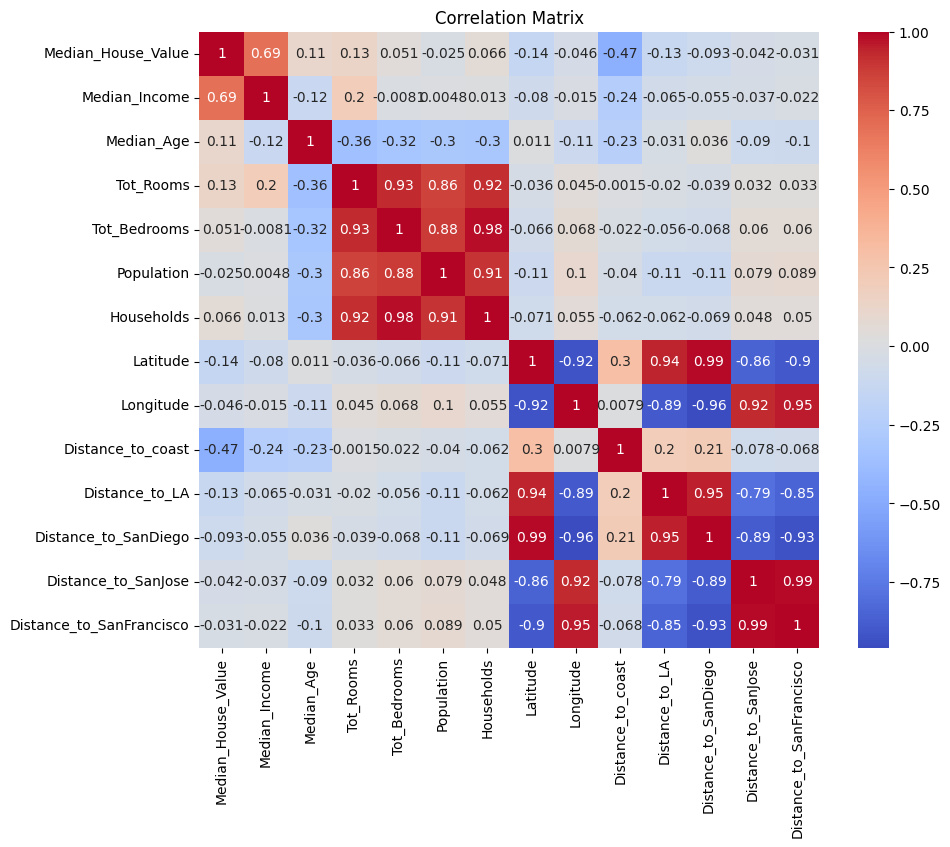

In [24]:
dataset.corr()
correlation_matrix = dataset.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [73]:
x_set = dataset[['Median_Income', 'Median_Age' , 'Tot_Rooms', 'Tot_Bedrooms', 'Population']]
# x_set = dataset[['Latitude', 'Longitude' , 'Distance_to_coast', 'Distance_to_LA', 'Distance_to_SanDiego', 'Distance_to_SanJose','Distance_to_SanFrancisco']]
# x_set = dataset[['Median_Income']]
y_set = dataset[['Median_House_Value']]


In [74]:
 
#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(x_set, y_set,test_size=0.1)
print(x_train)
print("\n")
print(y_train)
print("\n")
print(x_test)


       Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  Population
14197         3.2500          34       2328           444        1684
10849         4.0417          14       2598           759        1584
10325         4.3269          13       2021           362        1081
9360          3.5838          22       7446          1979        2980
15777         1.1185          52       1928           836        2124
...              ...         ...        ...           ...         ...
8191          4.3317          43       1471           301         767
18627         6.3617          20        922           155         361
11260         3.3281          25       3179           639        2526
9197          3.5500          17       1280           254         707
9775          3.1222          13       1642           418        1534

[18576 rows x 5 columns]


       Median_House_Value
14197             99600.0
10849            180900.0
10325            231400.0
9360             271300.0
15

In [75]:
#Create linear regression object
regr = LinearRegression()


In [76]:
# Make predictions using the testing set
model = regr.fit(x_train,y_train)



In [77]:
y_predict=model.predict(x_test)

In [78]:
model.score(x_test,y_test)

0.5874666697978603

In [79]:

print(y_test.shape)
print(y_predict.shape)

# r2 = r2_score(y_train, y_predict)
# print("R-squared:", r2)

(2064, 1)
(2064, 1)


In [80]:
r2 = r2_score(y_test, y_predict)
print("R-squared:", r2)

R-squared: 0.5874666697978603
